<a href="https://colab.research.google.com/github/iamabd53/Book_Recommendation_system/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b>Project Title : Book Recommendation System
During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.


**Content**



The Book-Crossing dataset comprises 3 files.


**Users**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.


**Books**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title,Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.


**Ratings**

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

#<b> Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from PIL import Image
import requests
from io import BytesIO
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import random

###**Data preprocessing**

In [2]:
books = pd.read_csv('/content/drive/MyDrive/ML project ALMA better/Books (1).csv', error_bad_lines = False)

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [5]:
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]

In [6]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [7]:
books.rename(columns= {'Book-Title':'title','Book-Author': 'author','Year-Of-Publication': 'year','Publisher':'publisher'},inplace= True )

In [8]:
books.head(2)

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [9]:
books.shape

(271360, 5)

In [10]:
users = pd.read_csv('/content/drive/MyDrive/ML project ALMA better/Users (1).csv',error_bad_lines = False)

In [11]:
users.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [12]:
users.rename(columns= {'User-ID':'user_id','Location':'location', 'Age':'age'},inplace= True)

In [13]:
users.head(2)

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [14]:
ratings = pd.read_csv('/content/drive/MyDrive/ML project ALMA better/Ratings (1).csv',error_bad_lines = False)

In [15]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [16]:
ratings.rename(columns= {'User-ID':'user_id','Book-Rating':'rating'},inplace= True)

In [17]:
books.shape

(271360, 5)

In [18]:
users.shape

(278858, 3)

In [19]:
ratings.shape

(1149780, 3)

In [20]:
ratings.head(2)

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5


In [21]:
ratings['user_id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: user_id, Length: 105283, dtype: int64

In [22]:
# 105283 unique users ne rating diya hai
ratings['user_id'].value_counts().shape

(105283,)

In [23]:
# wahi users jin logo ne minimum 200 books pr rating kiya hai
x= ratings['user_id'].value_counts() > 200

In [24]:
y = x[x].index

In [25]:
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [26]:
# wahi user jo y me hai
ratings = ratings[ratings['user_id'].isin(y)]

In [27]:
# 899 log mil k 526356 rating likhe hai
ratings.shape

(526356, 3)

In [28]:
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


#<b> Exploratory Data Analysis

In [29]:
# Top 10 Books
pd.value_counts(books['title']).iloc[:10]

Selected Poems                    27
Little Women                      24
Wuthering Heights                 21
The Secret Garden                 20
Dracula                           20
Adventures of Huckleberry Finn    20
Jane Eyre                         19
The Night Before Christmas        18
Pride and Prejudice               18
Great Expectations                17
Name: title, dtype: int64

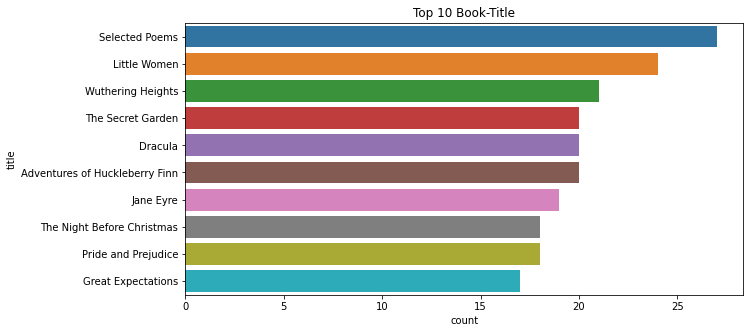

In [30]:
# Top 10 Books
plt.figure(figsize=(10,5))
sns.countplot(y='title',data=books, order=pd.value_counts(books['title']).iloc[:10].index)
plt.title('Top 10 Book-Title')
plt.show()



*   The top most book title found is Wild Animus.
*   Wild Animus is present in 365 rows


In [31]:
# unique Authors count
books['author'].nunique()

102023

In [32]:
# Top 10 Book Authors
books['author'].value_counts().head(10)

Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: author, dtype: int64

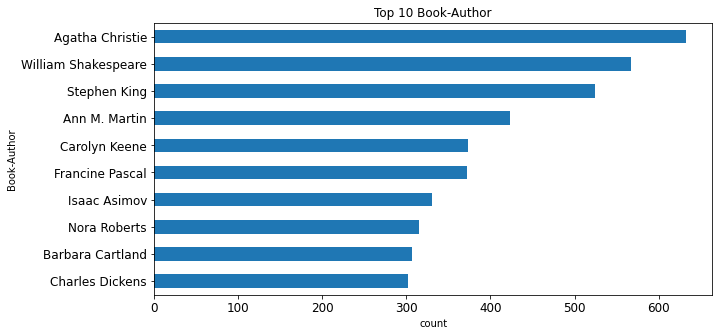

In [33]:
# Top 10 Book Authors
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ = books['author'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Book-Author', fontsize=12)
plt.xlabel('count')
plt.ylabel('Book-Author')
plt.show()

*   The top most author found is Nora Roberts.
*   3958 Books written By Nora Roberts books in Data Frmae.

In [34]:
# COunt of Unique Publisher
books['publisher'].nunique()

16807

In [35]:
# Top 10 Publshers
books['publisher'].value_counts().head(10).sort_values(ascending=True)

Warner Books                2727
Berkley Publishing Group    2771
Penguin Books               2844
Simon &amp; Schuster        2971
Scholastic                  3160
Bantam Books                3646
Ballantine Books            3783
Pocket                      3905
Silhouette                  4220
Harlequin                   7535
Name: publisher, dtype: int64

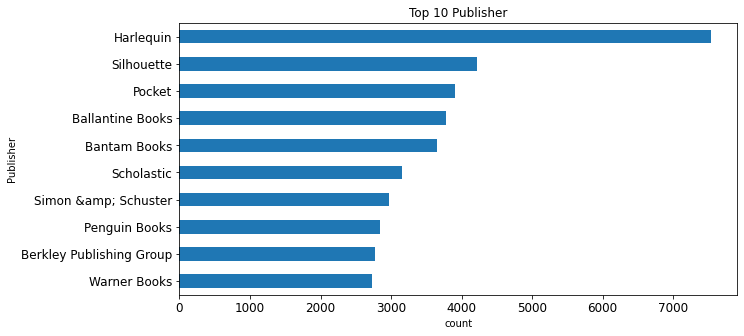

In [36]:
# Top 10 Publishers
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ = books['publisher'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Publisher', fontsize=12)
plt.xlabel('count')
plt.ylabel('Publisher')
plt.show()

*   The top most Publishers found is Pocket.
*   10786 Books Published By Pocket.

In [37]:
# year of publication Ratio
books['year'].value_counts().head(10)

2002    13903
2001    13715
1999    13414
2000    13373
1998    12116
2003    11610
1997    11494
1996    10687
1995    10259
1994     8857
Name: year, dtype: int64

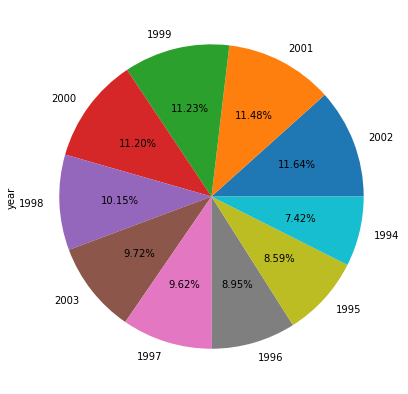

In [38]:
# year of Publication Ratio
fig= plt.figure(figsize=(15,7))
books['year'].value_counts().head(10).plot(kind='pie', autopct='%1.2f%%')
plt.show()

*  Most books were published in the year of 2002.

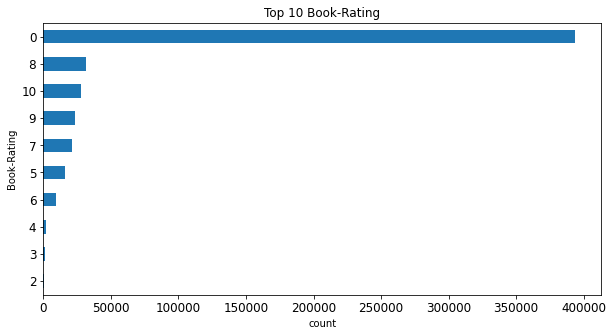

In [39]:
# Checking the ratings.
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ =ratings['rating'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Book-Rating', fontsize=12)
plt.xlabel('count')
plt.ylabel('Book-Rating')
plt.show()

*  Highest rating is 8 out of 10.
*  Lowest rating is 1 out of 10.
*  Most of the people haven't given the ratings.

#<b> **Building Model**

In [40]:
# Now we'll join ratings and books on the basis of ISBN number
ratings_with_books = ratings.merge(books, on='ISBN')

In [41]:
# we have only those ratings of books which are avilable in our dataset 
ratings_with_books.shape

(487671, 7)

In [42]:
ratings_with_books.head(2)

,user_id,ISBN,rating,title,author,year,publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc


In [43]:
number_rating= ratings_with_books.groupby('title')['rating'].count().reset_index()

In [44]:
number_rating.head()

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [45]:
number_rating.rename(columns= {'rating':'number of ratings'}, inplace= True)

In [46]:
number_rating.head(2)

,title,number of ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1


In [47]:
number_rating.sample(50)

,title,number of ratings
145092,This Sweet Sickness,1
141521,The Viscott Method: A Revolutionary Program fo...,1
6297,Ace Ventura: Pet Detective (Pictureback),1
64214,Just Desserts (Savannah Reid Mystery Series),1
43437,Final Surrender (Too Hot To Handle) (Harlequin...,3
56692,How Far Would You Have Gotten If I Hadn't Call...,1
109457,Star Wars: The Truce at Bakura (Star Wars (Ran...,12
87139,On My Honor,2
46654,From Boss To Bridegroom (The Coltons),1
8465,Amanda Rose,3


In [48]:
final_rating = ratings_with_books.merge(number_rating, on='title')

In [49]:
final_rating.head(2)

,user_id,ISBN,rating,title,author,year,publisher,number of ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82


In [50]:
final_rating.shape

(487671, 8)

In [51]:
final_rating= final_rating[final_rating['number of ratings']>=50]

In [52]:
final_rating.shape

(61853, 8)

In [53]:
final_rating.drop_duplicates(['user_id','title'], inplace= True)

In [54]:
final_rating.shape

(59850, 8)

In [55]:
book_pivot = final_rating.pivot_table(columns='user_id', index='title', values='rating' )

In [56]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [57]:
book_pivot.shape

(742, 888)

In [58]:
book_pivot.fillna(0, inplace=True)

In [59]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
from scipy.sparse import csr_matrix
book_sparse= csr_matrix(book_pivot)

In [61]:
# it will calculate only non-zero value in pivot table, to calculate the distances
type(book_sparse)

scipy.sparse.csr.csr_matrix

In [62]:
# NearestNeighbors calculates distance and assign the closest element to one cluster
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm= 'brute')

In [63]:
# NearestNeighbors distances nikalega and sabse close wale ko ek cluster me daal dega

In [64]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [65]:
distances, suggestions = model.kneighbors(book_pivot.iloc[237, :].values.reshape(1, -1), n_neighbors=6)

In [66]:
distances

array([[ 0.        , 68.78953409, 69.5413546 , 72.64296249, 76.83098333,
        77.28518616]])

In [67]:
suggestions

array([[237, 240, 238, 241, 184, 536]])

In [68]:
book_pivot.index[237]

'Harry Potter and the Chamber of Secrets (Book 2)'

In [69]:
for i in range(len(suggestions)):
  print(book_pivot.index[suggestions[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')


In [70]:
np.where(book_pivot.index == 'Animal Farm')[0][0]

54

In [71]:
def recommend_book(book_name):
  book_id=np.where(book_pivot.index==book_name)[0][0]
  distances, suggestions = model.kneighbors(book_pivot.iloc[book_id, :].values.reshape(1, -1), n_neighbors=6)

  for i in range(len(suggestions)):
    if i == 0:
      print("The suggestion for", book_name,"are:")
    if not i:
      print(book_pivot.index[suggestions[i]])

In [72]:
recommend_book('Animal Farm')

The suggestion for Animal Farm are:
Index(['Animal Farm', 'Exclusive', 'Jacob Have I Loved', 'Second Nature',
       'Pleading Guilty', 'No Safe Place'],
      dtype='object', name='title')
